Modèle rotation lente

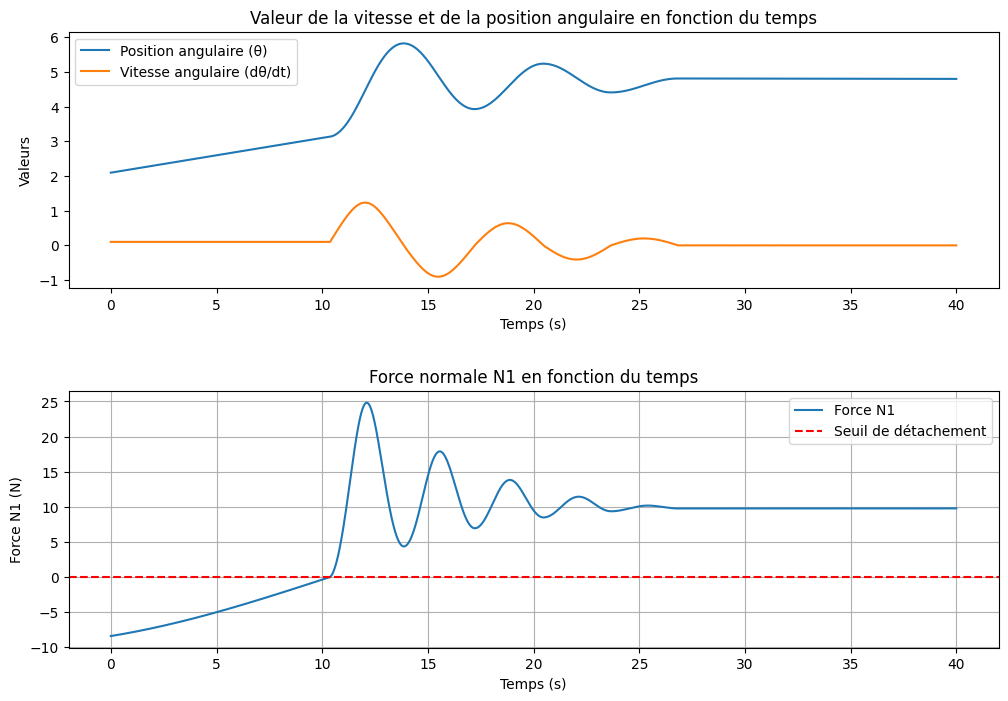

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle
g = 9.81  # Accélération de la pesanteur (m/s^2)
R = 10  # Rayon du tambour (m)
mu = 0.1  # Coefficient de friction
dt = 0.01  # Pas en temps (s)
t_max = 40  # Temps total de la simulation (s)

# Condition initiales
theta = 2*np.pi /3   # Angle initial (rad)
theta_dot = 0.1    # Vitesse angulaire initiale (rad/s)

# listes qui serviront à stocker les données
time = np.arange(0, t_max, dt)
theta_vals = []   # liste pour la position angulaire 
theta_dot_vals = []  # liste pour la vitesse angulaire 
theta_ddot_vals = []  # liste pour l'accélération angulaire 
N_vals = []  # liste pour la force N1

# Simulation loop
for t in time:
    # Calcul la force normale N1
    N = -g * np.sin(theta) + R * theta_dot**2
    N_vals.append(N)
    
    # Regarde si les vêtements se détachent
    if N >= 0:
        #Reste attaché
        theta_ddot = (-g * np.cos(theta) - mu * N * np.sign(theta_dot)) / R
    else:
        # Chute libre
        theta_ddot = 0
    
    # Mise à jour la position angulaire et la vitesse angulaire avec la méthode d'euler semi-implicite
    theta_dot += theta_ddot * dt
    theta += theta_dot * dt

    # Stock les résultats
    theta_vals.append(theta)
    theta_dot_vals.append(theta_dot)
    theta_ddot_vals.append(theta_ddot)


# afficher les résultats graphiquement
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
# affiche la position angulaire
plt.plot(time, theta_vals, label="Position angulaire (θ)")
# affiche la vitesse angulaire
plt.plot(time, theta_dot_vals, label="Vitesse angulaire (dθ/dt)")
# Si l'on souhaite afficher l'accéleration angulaire
#plt.plot(time, theta_ddot_vals, label="Accélération angulaire (d²θ/dt²)")

plt.xlabel("Temps (s)")
plt.ylabel("Valeurs")
plt.title("Valeur de la vitesse et de la position angulaire en fonction du temps")
plt.legend()

# afficher la force normale N1
plt.subplot(2, 1, 2)
plt.plot(time, N_vals, label="Force N1 ")
plt.axhline(0, color='red', linestyle='--', label="Seuil de détachement")
plt.xlabel("Temps (s)")
plt.ylabel("Force N1 (N)")
plt.title("Force normale N1 en fonction du temps")
plt.legend()
plt.grid()

plt.subplots_adjust(hspace=0.4)
plt.show()

modèle rotation rapide

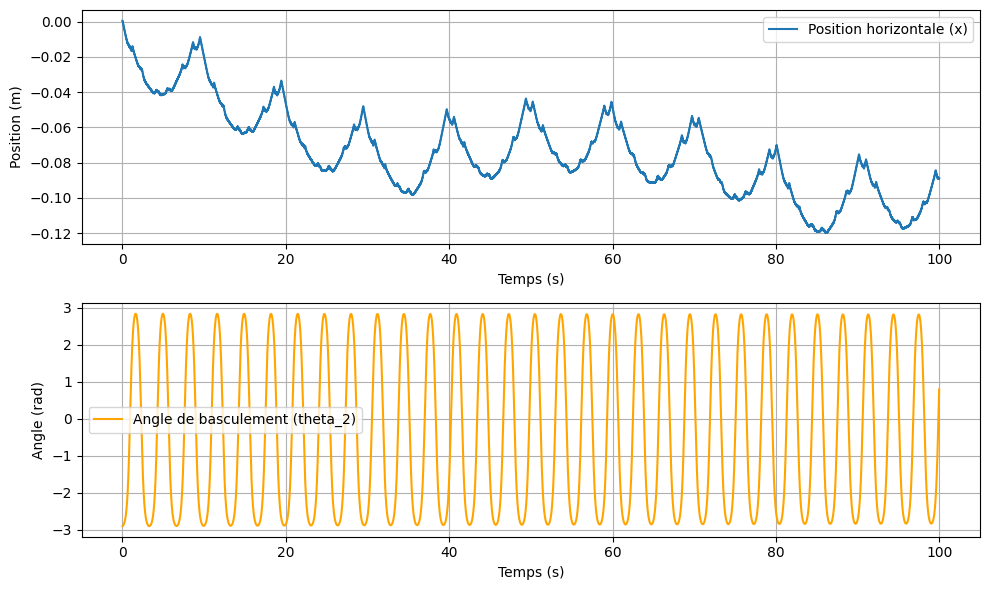

In [5]:
# Paramètres du modèle
M = 80 # Masse de la machine (kg)
m = 2  # Masse du linge (kg)
L1 = 0.3  # Distance entre le centre de rotation et la masse du linge (m)
L5 = 0.5  # Distance entre le centre de masse de la machine et le pivot (m)
L3 = 0.5  # Distance entre le pivot et le linge (m)
mu_floor = 0.5  # Coefficient de friction avec le sol
g = 9.81  # Accélération de la pesanteur (m/s^2)
dt = 0.01  # Pas en temps (s)
total_time = 100  # Temps total de la simulation (s)

# Condition initiales
x = 0.0  # Position horizontale initiale (m)
x_dot = 0.1  # Vitesse horizontale initiale (m/s)
theta_2 = 0.1  # Angle de basculement initial (rad)
theta_dot = 0.1  # Vitesse angulaire initiale (rad/s)

# Moments d'inertie
I = M * L5**2 + m * L3**2

# Fonction pour calculer la force nette
def calculate_f_net(x_dot, theta_2, theta_dot):
    f_centripetal = m * L1 * (theta_dot**2) * np.cos(theta_2)
    f_friction = -mu_floor * np.sign(x_dot) * ((M + m) * g)
    return f_centripetal + f_friction

# Fonction pour calculer le moment net
def calculate_tau(theta_2, theta_dot):
    tau_gravity = M * g * L5 * np.sin(theta_2)
    tau_centripetal = m * L1 * (theta_dot**2) * L3 * np.cos(theta_2)
    return tau_gravity + tau_centripetal

# Listes pour stocker les résultats
time = np.arange(0, total_time, dt)
x_values = []
x_dot_values = []
theta_2_values = []
theta_dot_values = []

# Simulation par la méthode d'Euler semi-implicite
for t in time:
    # Calcul de la force nette et du moment net
    f_net = calculate_f_net(x_dot, theta_2, theta_dot)
    tau_net = calculate_tau(theta_2, theta_dot)

    # Mise à jour des vitesses (semi-implicite)
    x_dot += (f_net / (M + m)) * dt
    theta_dot += (tau_net / I) * dt

    # Mise à jour des positions
    x += x_dot * dt
    theta_2 += theta_dot * dt

    # Stockage des résultats
    x_values.append(x)
    x_dot_values.append(x_dot)
    theta_2_values.append(theta_2)
    theta_dot_values.append(theta_dot)

#Correction sur l'angle de basculement car centré autour de 3 rad et non 0
theta_corrige=np.zeros(len(theta_2_values))
for i in range(len(theta_2_values)):
    theta_corrige[i]=theta_2_values[i]-3

# Tracé des résultats
plt.figure(figsize=(10, 6))

# Position horizontale
plt.subplot(2, 1, 1)
plt.plot(time, x_values, label="Position horizontale (x)")
plt.xlabel("Temps (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid()

# Angle de basculement
plt.subplot(2, 1, 2)
plt.plot(time, theta_corrige, label="Angle de basculement (theta_2)", color="orange")
plt.xlabel("Temps (s)")
plt.ylabel("Angle (rad)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
